In [17]:
import netwulf as nw
import networkx as nx
import urllib.request
import json
import pandas as pd
import re
import pickle
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import requests
from nltk.corpus import PlaintextCorpusReader
import urllib.parse
from nltk import word_tokenize
import nltk, re, pprint
import matplotlib_inline
%matplotlib inline
import pickle
from wordcloud import WordCloud
from collections import Counter
import community.community_louvain as community
import math
import powerlaw
import collections
import scipy
import squarify
import seaborn as sb
from nltk.corpus import stopwords
import matplotlib.patches as mpatches
import shutil
nltk.download("stopwords")
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luxonice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
with open('LargeData/data2022.pkl', 'rb') as f:
    data = pickle.load(f)

### Make Graph smaller

In [ ]:
author_posts = dict()
for post in tqdm(range(data.shape[0])):
    # Create a dictionary of authors and their flair, who they answered and their comment
    author_name = data['out_going'][post]
    author_flair = data['flair'][post]
    answered = data['in_going'][post]
    comment = data['comment'][post]
    comment_id = data['id'][post]
    
    # Add author to dictionary or add attributes
    if author_name not in author_posts:
        author_posts[author_name] = [author_flair,[answered],comment,[comment_id]]
    else:
        author_posts[author_name][1].append(answered)
        author_posts[author_name][2] += comment
        author_posts[author_name][3].append(comment_id)

In [ ]:
# Create a directed graph
DirectedGraph = nx.MultiDiGraph()
for author_name in author_posts.keys():
    # Add nodes to the graph
    DirectedGraph.add_node(author_name,flair=author_posts[author_name][0],comments=author_posts[author_name][2],comment_id=author_posts[author_name][3])

for author_name in author_posts.keys():
    # Add edges
    for edge_to in author_posts[author_name][1]:
        if edge_to != None:
            DirectedGraph.add_edge(author_name,edge_to)

# Create folder if it does not exist
if not os.path.exists('LargeData'):
    os.makedirs('LargeData')
    
# Save authors as a pickle file
pickle.dump(DirectedGraph, open('LargeData/Directed2022.pkl','wb'))

In [19]:
# Load graph from a pickle file
with open("LargeData/Directed2022.pkl", "rb") as file:
    G = pickle.load(file)

# Make GCC
UnG = G.to_undirected()
G = nx.subgraph(G, [node for node in G.nodes()][:1000])
G = nx.subgraph(G,max(nx.weakly_connected_components(G), key=len)) # GCC

# Basic statistics

In [20]:
print('Number of nodes: ',G.number_of_nodes())
print('Number of edges: ',G.number_of_edges())

Number of nodes:  924
Number of edges:  22651


In [21]:
print('Number of multiedges: ',len([x for x in G.edges() if G.number_of_edges(x[0],x[1]) > 1]))

Number of multiedges:  14158


Text(0, 0.5, 'Counts')

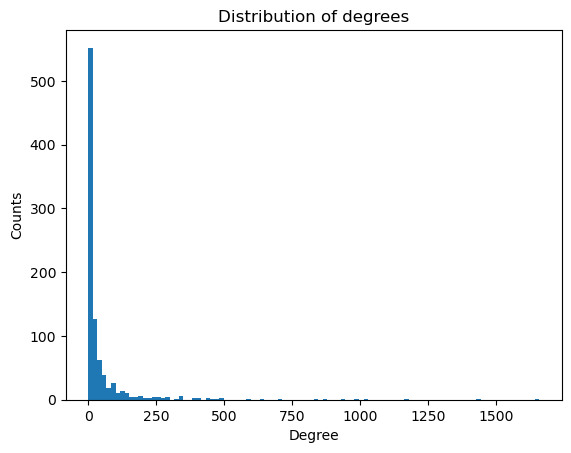

In [22]:
degree_sequence = [d for n, d in G.degree()]
plt.figure()
plt.hist(degree_sequence,bins=100)
plt.title('Distribution of degrees')
plt.xlabel('Degree')
plt.ylabel('Counts')

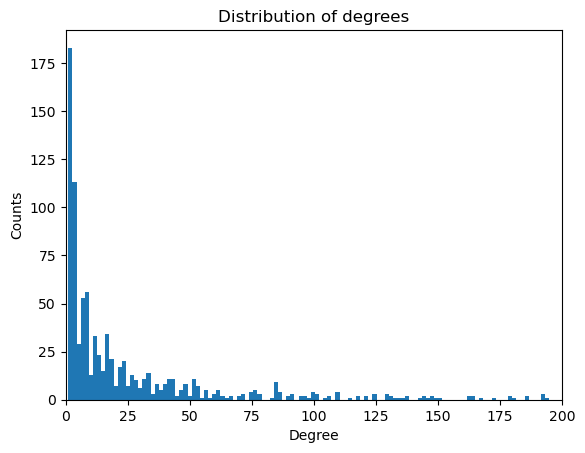

In [23]:
# Plot degree distribution with less tahn 1000 degrees
plt.figure()
plt.hist(degree_sequence,bins=1000)
plt.title('Distribution of degrees')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.xlim(0,200)
plt.show()

In [24]:
# Find node with highest degree
max_degree = 0
max_degree_node = None
for node in G.nodes():
    if G.degree(node) > max_degree:
        max_degree = G.degree(node)
        max_degree_node = node

print('Node with highest degree: ',max_degree_node,' with degree: ',max_degree)

Node with highest degree:  mirrorconspiracies  with degree:  1658


In [25]:
# Print flair of node with highest degree
print('Flair of node with highest degree: ',G.nodes[max_degree_node]['flair'])

Flair of node with highest degree:  entp


In [1]:
# Distribution of flair
flairs = [G.nodes[node]['flair'] for node in G.nodes()]
plt.figure()
plt.hist(flairs,bins=17)
plt.title('Histogram of Personality Types in Reddit Mbti')
plt.xlabel('Flair')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

# Histogram of flair counts
flair_values, flair_counts = zip(*flair_counts.items())  # Unzip the flair counts
plt.bar(flair_values, flair_counts, color='pink', alpha=0.7)
plt.title('Histogram of Personality Types in Reddit Mbti', fontweight = 'bold')
plt.xlabel('Personality type', color='black')
plt.ylabel('Count', color='black')
plt.xticks(rotation=90) 
plt.show()

NameError: name 'G' is not defined

In [2]:
#Plot degree distribution of the Rapper graph
fig,ax = plt.subplots(2,3,figsize=(16,10))

in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
in_degreeCount = collections.Counter(in_degree_sequence)

ax[0,0].bar(in_degreeCount.keys(), in_degreeCount.values(), color='darkgoldenrod')
ax[0,0].set_title("In Degree Distribution")
ax[0,0].set_ylabel("Multiplicity")
ax[0,0].set_xlabel("Degree")
ax[1,0].loglog(in_degreeCount.keys(), in_degreeCount.values(), color='darkgoldenrod',marker="o",linestyle="None")
ax[1,0].set_title("In Degree Distribution [Log-Log]")
ax[1,0].set_ylabel("Multiplicity")
ax[1,0].set_xlabel("Degree")

out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
out_degreeCount = collections.Counter(out_degree_sequence)

ax[0,1].bar(out_degreeCount.keys(), out_degreeCount.values(), color='darkgoldenrod')
ax[0,1].set_title("Out Degree Distribution")
ax[0,1].set_ylabel("Multiplicity")
ax[0,1].set_xlabel("Degree")
ax[1,1].loglog(out_degreeCount.keys(), out_degreeCount.values(), color='darkgoldenrod',marker="o",linestyle="None")
ax[1,1].set_title("Out Degree Distribution [Log-Log]")
ax[1,1].set_ylabel("Multiplicity")
ax[1,1].set_xlabel("Degree")

degree_distribution = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount=collections.Counter(degree_distribution)

ax[0,2].bar(degreeCount.keys(), degreeCount.values(), color='darkgoldenrod')
ax[0,2].set_title("Total Degree Distribution")
ax[0,2].set_ylabel("Multiplicity")
ax[0,2].set_xlabel("Degree")
ax[1,2].loglog(degreeCount.keys(), degreeCount.values(), color='darkgoldenrod',marker="o",linestyle="None")
ax[1,2].set_title("Total Degree Distribution [Log-Log]")
ax[1,2].set_ylabel("Multiplicity")
ax[1,2].set_xlabel("Degree")

plt.show()

NameError: name 'plt' is not defined

In [28]:
in_degree_sequence = np.array(in_degree_sequence)
in_degree_sequence = in_degree_sequence[in_degree_sequence!=0]
results=powerlaw.Fit(in_degree_sequence)
print(f"The exponent for in-degree is: {results.power_law.alpha}")

The exponent for in-degree is: 2.2263484548362484


Calculating best minimal value for power law fit
/Users/luxonice/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [29]:
out_degree_sequence = np.array(out_degree_sequence)
out_degree_sequence = out_degree_sequence[out_degree_sequence!=0]
out_degree_sequence = out_degree_sequence[out_degree_sequence!=np.nan]

results=powerlaw.Fit(out_degree_sequence)
print(f"The exponent for out-degree is: {results.power_law.alpha}")

The exponent for out-degree is: 1.942606145403052


Calculating best minimal value for power law fit


In [30]:
#Compare to random graph
N=len(G.nodes)
p=2*len(G.edges)/(N*(N-1))

random_graph=nx.erdos_renyi_graph(N,p,directed=False,seed=42)
degree_sequence = sorted([d for n, d in random_graph.degree()], reverse=True)  # degree sequence
degree_sequence = np.array(degree_sequence)
degree_sequence = degree_sequence[degree_sequence!=0]
degreeCount = collections.Counter(in_degree_sequence)
results=powerlaw.Fit(degree_sequence)
print(f"The exponent for a ranom graph is {results.power_law.alpha}")

The exponent for a ranom graph is 23.647045524987636


Calculating best minimal value for power law fit


In [31]:
#nw.visualize(G)

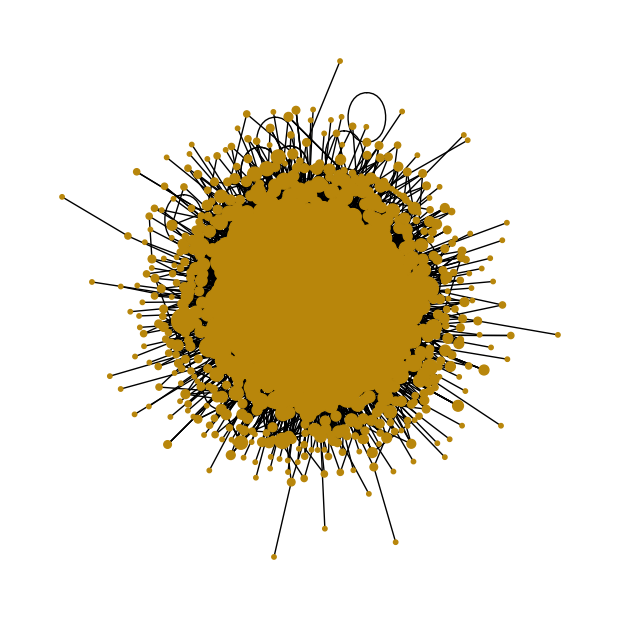

In [32]:
# Convert to undirected graph
UG = G.to_undirected()

# Define node size by degree
node_sizes = []
for node in UG.nodes():
    node_sizes.append(UG.degree[node]*10)

# Draw graph
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(UG,node_color='darkgoldenrod',node_size=node_sizes, with_labels=False)
plt.show()

We have made a histogram over the personality types in the Reddit group. 
As seen in the figure the personality type that is mostly active is INTP, while the personality type who is less active is ESFJ. 

The description of each letter in the personality types are the following: 
N: Intuitiv
T: Thinking
F: Feeling
S: Observant
J: Judging
P: Prospecting
I: Introvert
E: Extrovert

So the above will describe the five personality aspects, when combined defines the personality types. 

With I, is normally introverted individuals who gets exhausted by social interaction and often get sensitive to external stimulations. 

While E, is normally extroverted individuals, who prefer being in groups and get's energy by social interactions. 

S, is the observants and they are practial and down to earth. 

N is intuitive individuals, they are imaginative and open-minded and curious. 

T is thinking, they focus on rationality and prioritize logic over emotions.

F is feeling individuals, and they are sensitive and emotionally expressive. 

J is judging individuals, they are highly organized and value clarity and structure. 

P is prospecting, and they are very good at improvising and spotting oppurtinities. 


INTP personality type is known as the logician, and has the 4 aspects I, N, T, P. 
So overall you can describe them as introverted, intuitve, thinking perople and prosecting people, while the ESFJ, has the aspects E, S, F, J, where you can descripe them as extroverted, observant, emotionally expressive and judging people. They are the obesite of the personality type who is mostly active in the group MBTI. 

The reasoning behind this could be, that the people who mostly have the aspect E are more often in social interaction rather than solitary activities, meaning that they are not home as much as the people with the aspect I. I are defined as introverts and often more home, and infront of the computer. AKA more active online than at social gatherings.

Bibliography:
https://www.16personalities.com/articles/our-theory